# Logistic Regression Assignments

# Dataset : bank-full

# Objective - Whether the client has subscribed a term deposit or not

In [1]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
bank = pd.read_csv('E:\\Study\\ASSIGNMENTS\\Logistic regression\\bank-full.csv', sep= ';')

In [3]:
bank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
bank.shape

(45211, 17)

# Null value & data type check

In [5]:

bank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB



There is no null value present in side the data and also the data types of all attributes are appropriate

In [6]:
#total columns of the data set
bank.columns

Index(['age', 'job', 'marital', 'education', 'default', 'balance', 'housing',
       'loan', 'contact', 'day', 'month', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'y'],
      dtype='object')

# Checking which attributes have good impact to predict whether the cilent has subsccribed a term deposit or not

<AxesSubplot:xlabel='y', ylabel='count'>

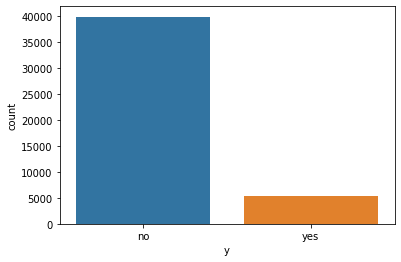

In [7]:
sns.countplot(x='y',data=bank) ##We can easily see in plot data is biased means the no. of non subsriber is high

Text(0, 0.5, 'Frequency of Purchase')

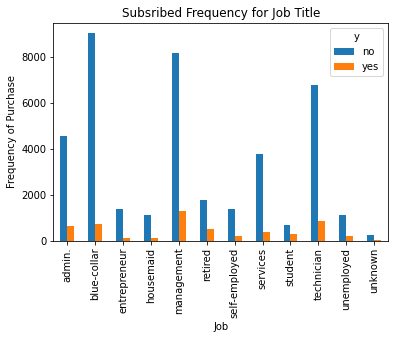

In [8]:
%matplotlib inline
pd.crosstab(bank.job,bank.y).plot(kind='bar')
plt.title('Subsribed Frequency for Job Title')
plt.xlabel('Job')
plt.ylabel('Frequency of Purchase')

# As per graph we can see

# All occupation have different type of subscription so it is important feature

Text(0, 0.5, 'Proportion of Customers')

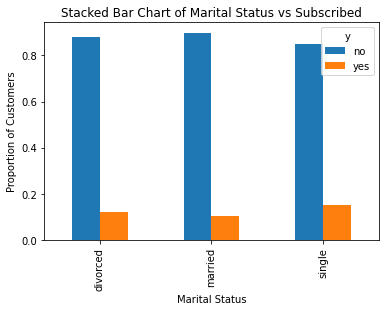

In [9]:

table=pd.crosstab(bank.marital,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar', stacked=False)
plt.title('Stacked Bar Chart of Marital Status vs Subscribed')
plt.xlabel('Marital Status')
plt.ylabel('Proportion of Customers')

# As per graph we can see all status have same frequency so it is not important feature

Text(0, 0.5, 'Proportion of Customers')

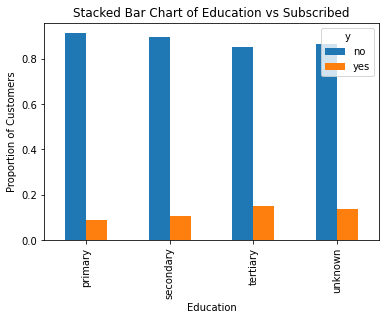

In [10]:
table=pd.crosstab(bank.education,bank.y)
table.div(table.sum(1).astype(float), axis=0).plot(kind='bar')
plt.title('Stacked Bar Chart of Education vs Subscribed')
plt.xlabel('Education')
plt.ylabel('Proportion of Customers')
##As per graph we can see all education have same frequency so it is not important feature

Text(0, 0.5, 'Frequency of Subsribe')

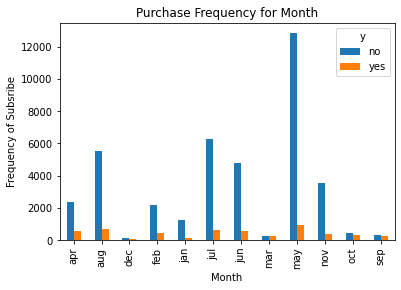

In [11]:
pd.crosstab(bank.month,bank.y).plot(kind='bar')
plt.title('Purchase Frequency for Month')
plt.xlabel('Month')
plt.ylabel('Frequency of Subsribe')
##Month feature may be best feature but it is related to number of calles so we will not consider it

<AxesSubplot:title={'center':'age'}, xlabel='y'>

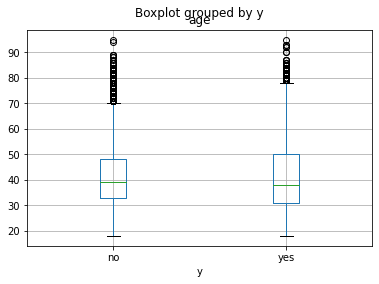

In [12]:
bank.boxplot(column='age', by='y')
#In this feature we can clearly see there are lot of outliers and can say this is not a great feature.

Text(0, 0.5, 'Frequency of Subscribe')

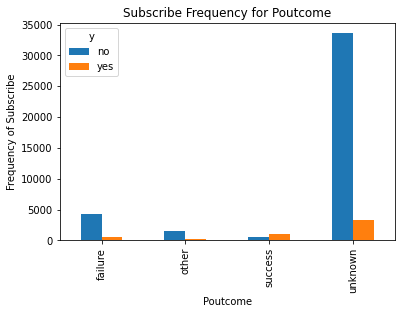

In [13]:
pd.crosstab(bank.poutcome,bank.y).plot(kind='bar')
plt.title('Subscribe Frequency for Poutcome')
plt.xlabel('Poutcome')
plt.ylabel('Frequency of Subscribe')
#outcome of the previous marketing campaign so it is important feature

# day means last contact day of the month on the basis of it we can't say client will purchase or not

# campaign means number of contacts performed during this campaign and for this client it may be baised & depend on client to client it is not important feature

# pdays means number of days that passed by after the client was last contacted from a previous campaign it same as the campaign feature

# Loan & housing loan don't have important role in predict client subscribe or no0t

In [14]:
bank.drop(["month","education","pdays","day","campaign","age",'loan',"housing",'marital'],axis=1,inplace=True)

In [15]:
##After removing columns, which are not important feature of predicting client will subsribe or not
bank.head()

,job,default,balance,contact,duration,previous,poutcome,y
0,management,no,2143,unknown,261,0,unknown,no
1,technician,no,29,unknown,151,0,unknown,no
2,entrepreneur,no,2,unknown,76,0,unknown,no
3,blue-collar,no,1506,unknown,92,0,unknown,no
4,unknown,no,1,unknown,198,0,unknown,no


# We will create dummy variable for categorical data

In [16]:

contactd=pd.get_dummies(bank['contact'],drop_first=True)

In [17]:
jobd=pd.get_dummies(bank['job'],drop_first=True)

In [18]:
poutcomed=pd.get_dummies(bank['poutcome'],drop_first=True)

In [19]:
defaultd = pd.get_dummies(bank['default'],drop_first=True)

In [20]:
##Concate the the dummy varibles
bank = pd.concat([bank,defaultd,poutcomed,jobd,contactd],axis=1)
bank.head()

,job,default,balance,contact,duration,previous,poutcome,y,yes,other,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,management,no,2143,unknown,261,0,unknown,no,0,0,...,1,0,0,0,0,0,0,0,0,1
1,technician,no,29,unknown,151,0,unknown,no,0,0,...,0,0,0,0,0,1,0,0,0,1
2,entrepreneur,no,2,unknown,76,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
3,blue-collar,no,1506,unknown,92,0,unknown,no,0,0,...,0,0,0,0,0,0,0,0,0,1
4,unknown,no,1,unknown,198,0,unknown,no,0,0,...,0,0,0,0,0,0,0,1,0,1


# We will drop the exist categorical columns for whome we have make dummy variable

In [21]:
bank.drop(['default','poutcome','job',"contact"],axis=1,inplace = True)
bank.head()

,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,no,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,no,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,no,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,no,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,no,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1


In [22]:
##Map the output variable for converting categorical to numerical data & create new dataframe
bank_new= bank.copy()
bank_new['y'] = bank_new['y'].map({'no':0,'yes':1})
bank_new


,balance,duration,previous,y,yes,other,success,unknown,blue-collar,entrepreneur,...,management,retired,self-employed,services,student,technician,unemployed,unknown,telephone,unknown
0,2143,261,0,0,0,0,0,1,0,0,...,1,0,0,0,0,0,0,0,0,1
1,29,151,0,0,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,1
2,2,76,0,0,0,0,0,1,0,1,...,0,0,0,0,0,0,0,0,0,1
3,1506,92,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,0,1
4,1,198,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45206,825,977,0,1,0,0,0,1,0,0,...,0,0,0,0,0,1,0,0,0,0
45207,1729,456,0,1,0,0,0,1,0,0,...,0,1,0,0,0,0,0,0,0,0
45208,5715,1127,3,1,0,0,1,0,0,0,...,0,1,0,0,0,0,0,0,0,0
45209,668,508,0,0,0,0,0,1,1,0,...,0,0,0,0,0,0,0,0,1,0


# Predicting for categorical variable we will create logistic regression model

In [27]:
#Assigne the input and output variables in x and y
X = bank.drop("y",axis=1)
Y = bank["y"]

In [28]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression()
classifier.fit(X,Y)

LogisticRegression()

In [29]:
##Prediction probabilitie of output 
y_pred = classifier.predict(X)
y_pred_prob=classifier.predict_proba(X)
y_pred_prob


array([[0.97641549, 0.02358451],
       [0.98507649, 0.01492351],
       [0.99002649, 0.00997351],
       ...,
       [0.00853656, 0.99146344],
       [0.88226975, 0.11773025],
       [0.87910207, 0.12089793]])

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
cm=confusion_matrix = confusion_matrix(Y,y_pred)
accuracy=accuracy_score(Y,y_pred)
print (cm,accuracy)

[[39005   917]
 [ 3605  1684]] 0.8999800933401163


# Accuray of model is 90% it is good model

In [32]:
from sklearn.metrics import classification_report
print(classification_report(Y,y_pred))

              precision    recall  f1-score   support

          no       0.92      0.98      0.95     39922
         yes       0.65      0.32      0.43      5289

    accuracy                           0.90     45211
   macro avg       0.78      0.65      0.69     45211
weighted avg       0.88      0.90      0.88     45211



# ROC Curve

In [33]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder() 
  
y_predict= label_encoder.fit_transform(y_pred) 

y_actual= label_encoder.fit_transform(bank_new['y'])

Text(0, 0.5, 'True Positive Rate')

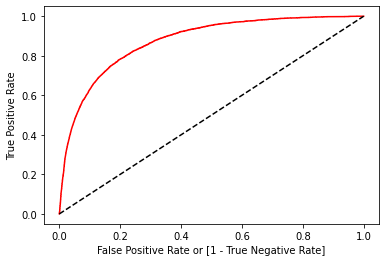

In [34]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

fpr, tpr, thresholds = roc_curve(y_actual, classifier.predict_proba (X)[:,1])

auc = roc_auc_score(y_actual, y_predict)

import matplotlib.pyplot as plt
plt.plot(fpr, tpr, color='red', label='logit model ( area  = %0.2f)'%auc)
plt.plot([0, 1], [0, 1], 'k--')
plt.xlabel('False Positive Rate or [1 - True Negative Rate]')
plt.ylabel('True Positive Rate')

In [35]:
auc
##Area under the curve

0.6477134406230929

# Conclusion:- We have created model with approprite feature & get around 90% accuracy for prediction of client will subsribe the term deposit or not but as per some internal parameters i observed that¶


# As per ROC curve we found that area under curve is 64.8% it means approx 65% we can predict perfactly true positive rate it is baised beacuse our dataset has been a large frequency of negative result

# Second thing precision, senstivity(true positive rate),Specificity(true negative rate ),f1-score also biased towords of negative result because of our dataset has been a large frequency of negative result¶

# precision recall f1-score support


# no 0.92 0.98 0.95 39922

# yes 0.65 0.32 0.43 5289

# so we can say this is avarage model prediction for client will be subscibed or not